In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata
from chainer import cuda, Variable, FunctionSet, optimizers
import chainer.functions  as F
from chainer import serializers

import sys

plt.style.use('ggplot')

In [3]:
# 確率的勾配降下法で学習させる際の１回分のバッチサイズ
batchsize = 100

# 学習の繰り返し回数
n_epoch   = 20

# 中間層の数
n_units   = 1000


In [4]:
# load the model and the optimizer
model = FunctionSet(l1=F.Linear(784, n_units),
                    l2=F.Linear(n_units, n_units),
                    l3=F.Linear(n_units, 10))
optimizer = optimizers.Adam()
optimizer.setup(model)
print('load the model')
serializers.load_npz('mnist.model',  model)
print('load the optimizer')
serializers.load_npz('mnist.state', optimizer)

load the model
load the optimizer


In [6]:
# #HOME/scikit_learn_data/mldata/mnist-original.mat にキャッシュされる
print('fetch MNIST dataset')
mnist = fetch_mldata('MNIST original')
# mnist.data : 70,000件の784次元ベクトルデータ
mnist.data   = mnist.data.astype(np.float32)
mnist.data  /= 255     # 0-1のデータに変換

# mnist.target : 正解データ（教師データ）
mnist.target = mnist.target.astype(np.int32)

fetch MNIST dataset


In [7]:
# 手書き数字データを描画する関数
def draw_digit(data):
    size = 28
    plt.figure(figsize=(2.5, 3))

    X, Y = np.meshgrid(range(size),range(size))
    Z = data.reshape(size,size)   # convert from vector to 28x28 matrix
    Z = Z[::-1,:]             # flip vertical
    plt.xlim(0,27)
    plt.ylim(0,27)
    plt.pcolor(X, Y, Z)
    plt.gray()
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")

    plt.show()

In [8]:
# 学習用データを N個、検証用データを残りの個数と設定
N = 60000
x_train, x_test = np.split(mnist.data,   [N])
y_train, y_test = np.split(mnist.target, [N])
N_test = y_test.size

# Setup optimizer
optimizer = optimizers.Adam()
optimizer.setup(model)

[2]


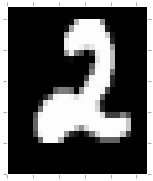

result: 2


In [9]:
perm = np.random.permutation(N)
print(y_train[perm[5:6]])
draw_digit(x_train[perm[5:6]])


x = Variable(x_train[perm[5:6]])
#x = Variable(x_train[[27034]])

h1 = F.dropout(F.relu(model.l1(x)),  train=False)
h2 = F.dropout(F.relu(model.l2(h1)), train=False)
y  = model.l3(h2)
y.data
#perm[5:6]
#y

max = 0
index = -1
for i in range(len(y.data[0])):
    if y.data[0][i] > max:
        max = y.data[0][i] 
        index = i
print("result:", index)